Machine Learning software to predict the prices of stock

In [ ]:
!pip install yfinance
!pip install -q xlrd
!pip install mpl_finance
!pip install keras.models
!pip install keras.layers
!pip install sklearn.preprocessing

ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers
ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import os
from pandas import ExcelWriter
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
yf.pdr_override()

Choose stocks and starting date of your dataset

ENter symbolAAPL
Year from which you want to check2019
How many days of data do you wish to use10
[*********************100%%**********************]  1 of 1 completed


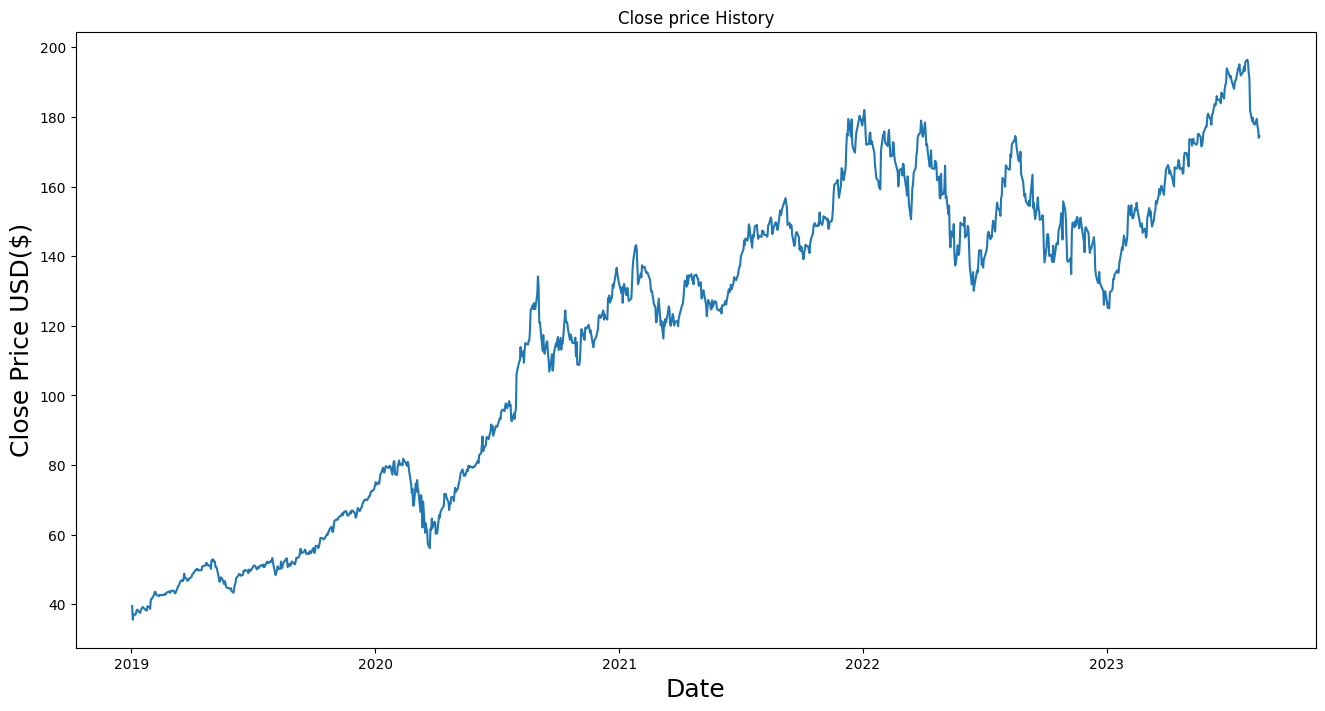

In [ ]:
stock=input("Enter symbol")
sy=int(input("Year from which you want to check"))
sm=1
sd=1
start=dt.datetime(sy,sm,sd)
now=dt.datetime.now()
n=int(input("How many days of data do you wish to use"))
df=pdr.get_data_yahoo(stock,start,now)
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

WORKING AND MAKING OF THE MODEL

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
#scaling the data now
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
#train the data now
train_data=scaled_data[0:training_data_len,:]
#split the data now
x_train=[]
y_train=[]

for i in range(n,len(train_data)):
  x_train.append(train_data[i-n:i,0])
  y_train.append(train_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #Reshaping because LSTM takes 3d objects only
model=Sequential()
model.add(LSTM(200,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)
#creating the testing dataset
test_data=scaled_data[training_data_len-n:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(n,len(test_data)):
  x_test.append(test_data[i-n:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


8/8 [==============================] - 1s 17ms/step


Calculating the Root Mean Squared Error, RMSE of 0 means our model works best

In [ ]:
#rmse calculate
rmse=np.sqrt(np.mean(predictions-y_test)**2)
print("The root mean squared error is",rmse)

The root mean squared error is 3.5664491121349418


Graph the traning dataset to check our model

<ipython-input-7-4ce8851cb561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


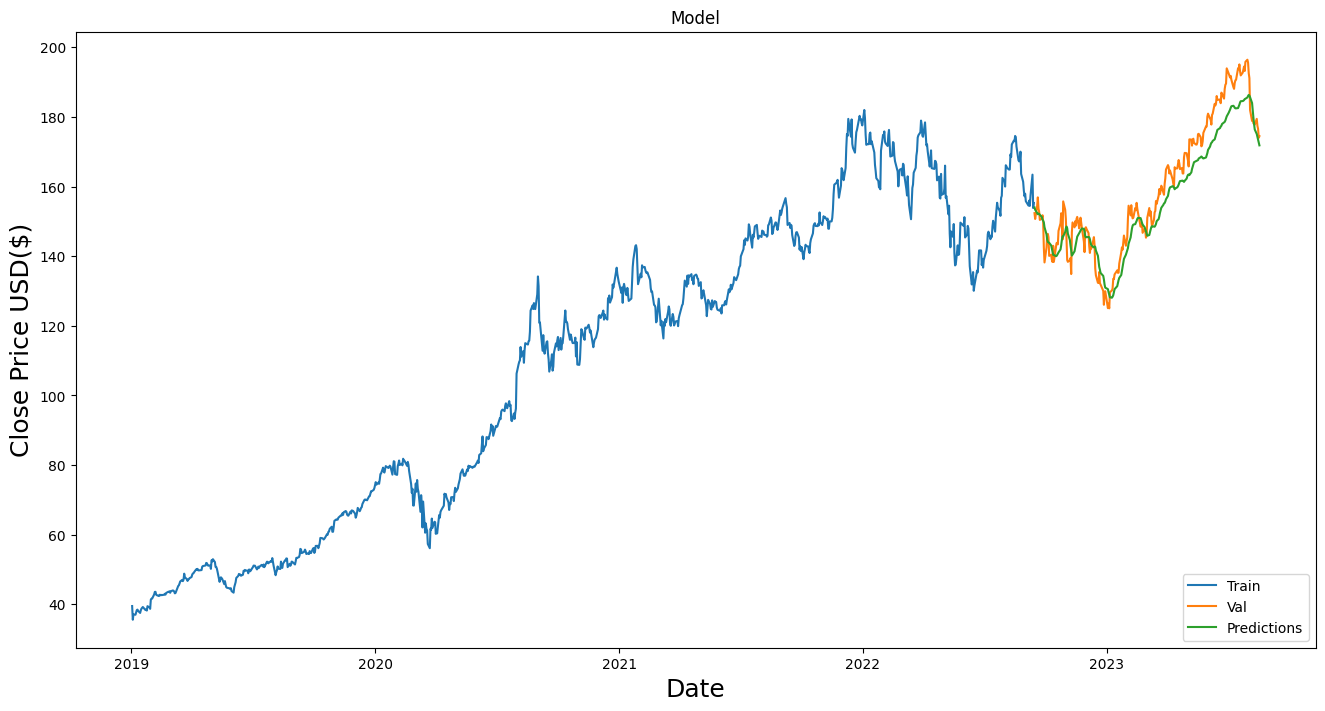

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


Tabular visualisation of the above graph

In [ ]:
valid

,Close,Predictions
Date,,
2022-09-15,152.369995,154.025146
2022-09-16,150.699997,153.351501
2022-09-19,154.479996,152.404251
2022-09-20,156.899994,152.045380
2022-09-21,153.720001,152.249756
...,...,...
2023-08-14,179.460007,175.114136
2023-08-15,177.449997,174.305481
2023-08-16,176.570007,173.518036


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(valid, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(valid, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(valid, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(valid, *['Predictions'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(valid, *[[['Close', 'Predictions']]], **{})
chart